In [8]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import missingno

In [9]:
# cargar los datos 
# Parte1
parte1 = pd.read_csv('movies_datasets_parte1.csv')
# Parte2
parte2 = pd.read_csv('movies_datasets_parte2.csv')

# Concatenar las partes del dataframe
df = pd.concat([parte1, parte2], ignore_index=True)


In [10]:
# Verificar las primeras filas del dataset
df.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,vote_count,name_to_collection,name_genres,name_production_companies,name_spoken_languages,name_production_countries,release_year,return,names_actors,name_director
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,5415.0,Toy Story Collection,"['Animation', 'Comedy', 'Family']",Pixar Animation Studios,English,United States of America,1995,12.451801,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,2413.0,NaN,"['Adventure', 'Fantasy', 'Family']",TriStar Pictures,English,United States of America,1995,4.043035,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,92.0,Grumpy Old Men Collection,"['Romance', 'Comedy']",Warner Bros.,English,United States of America,1995,0.000000,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,34.0,NaN,"['Comedy', 'Drama', 'Romance']",Twentieth Century Fox Film Corporation,English,United States of America,1995,5.090760,"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,173.0,Father of the Bride Collection,['Comedy'],Sandollar Productions,English,United States of America,1995,0.000000,"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer


In [11]:
print(df['names_actors'].head())

0    ['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...
1    ['Robin Williams', 'Jonathan Hyde', 'Kirsten D...
2    ['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...
3    ['Whitney Houston', 'Angela Bassett', 'Loretta...
4    ['Steve Martin', 'Diane Keaton', 'Martin Short...
Name: names_actors, dtype: object


In [12]:
# Resumen estadístico de las variables numéricas
df.describe()

# Resumen de las variables categóricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   budget                     45451 non-null  float64
 1   id                         45451 non-null  int64  
 2   original_language          45440 non-null  object 
 3   overview                   44510 non-null  object 
 4   popularity                 45451 non-null  float64
 5   release_date               45451 non-null  object 
 6   revenue                    45451 non-null  float64
 7   runtime                    45205 non-null  float64
 8   status                     45371 non-null  object 
 9   tagline                    20425 non-null  object 
 10  title                      45451 non-null  object 
 11  vote_average               45451 non-null  float64
 12  vote_count                 45451 non-null  float64
 13  name_to_collection         4497 non-null   obj

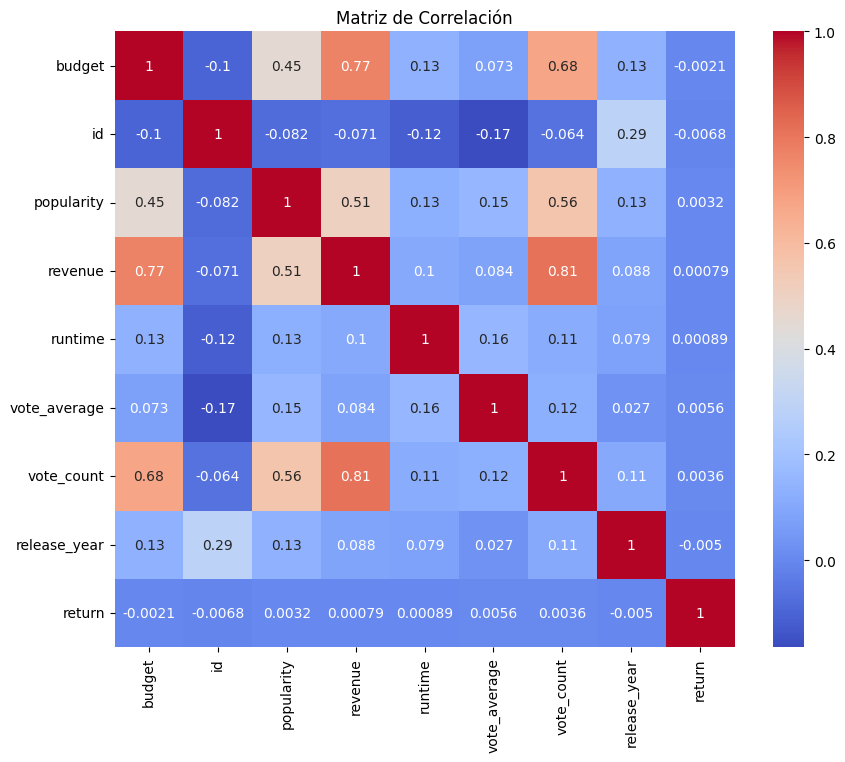

In [13]:
# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación solo con las columnas numéricas
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

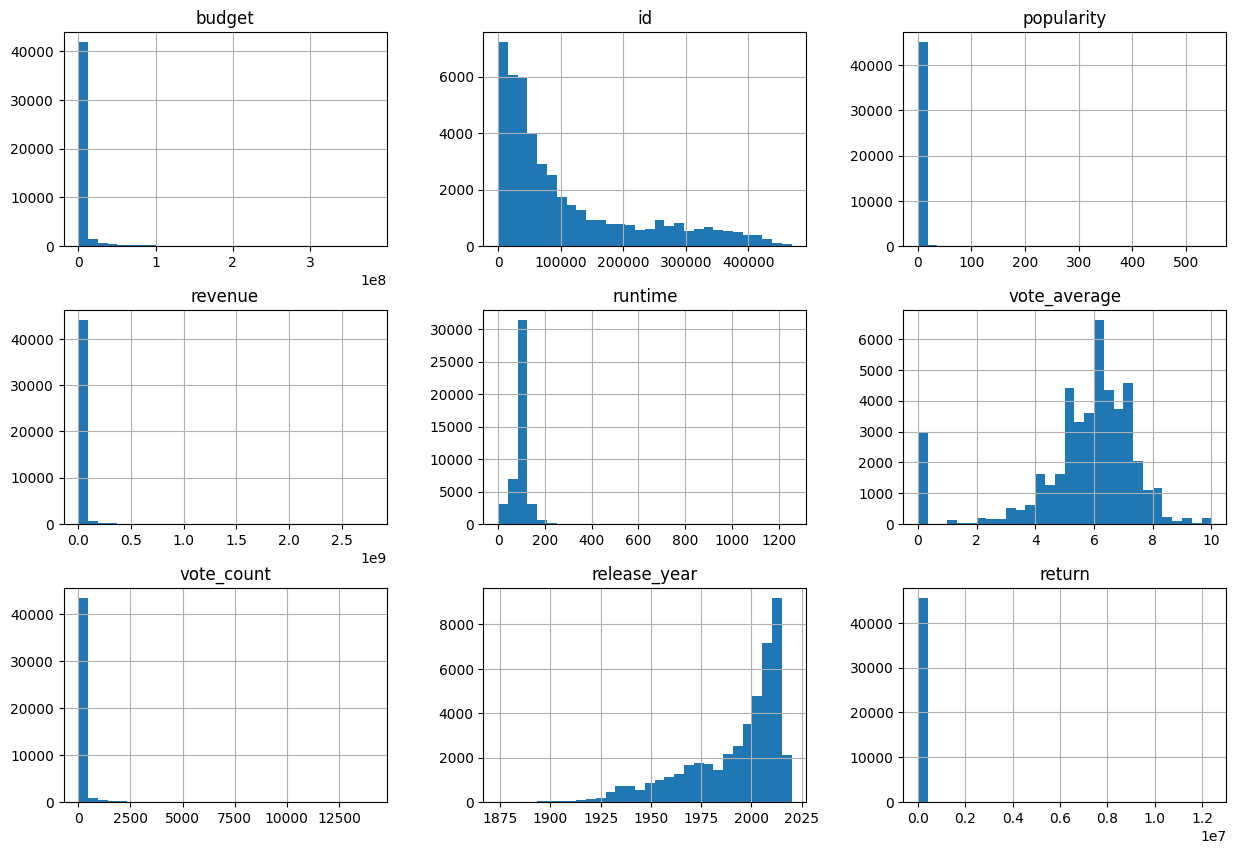

In [14]:
# Visualizacion de las distribuciones de las variables individuales para observar su forma (normal, sesgada, etc.).
# Esto puede ayudar a detectar posibles valores atípicos (outliers) y entender la dispersión de los datos.
df_numeric.hist(bins=30, figsize=(15,10))
plt.show()

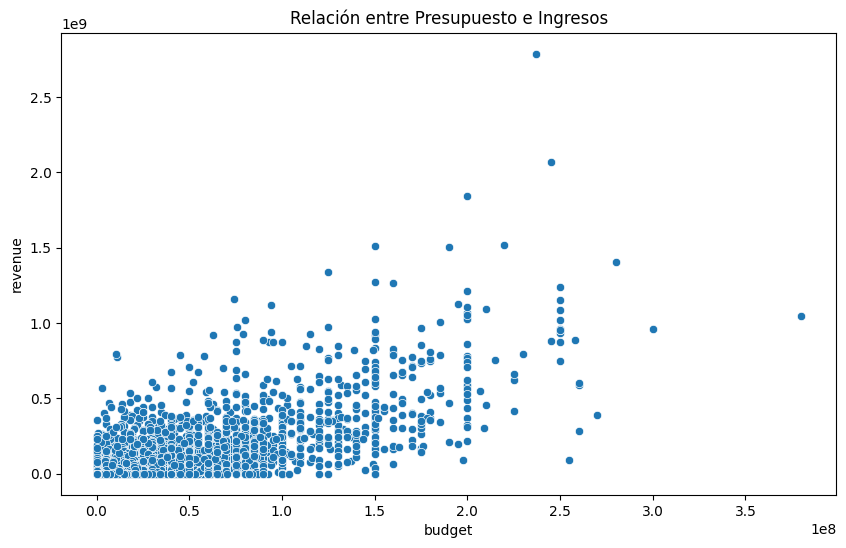

In [15]:
# Relación entre presupuesto y revenue
plt.figure(figsize=(10,6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Relación entre Presupuesto e Ingresos')
plt.show()

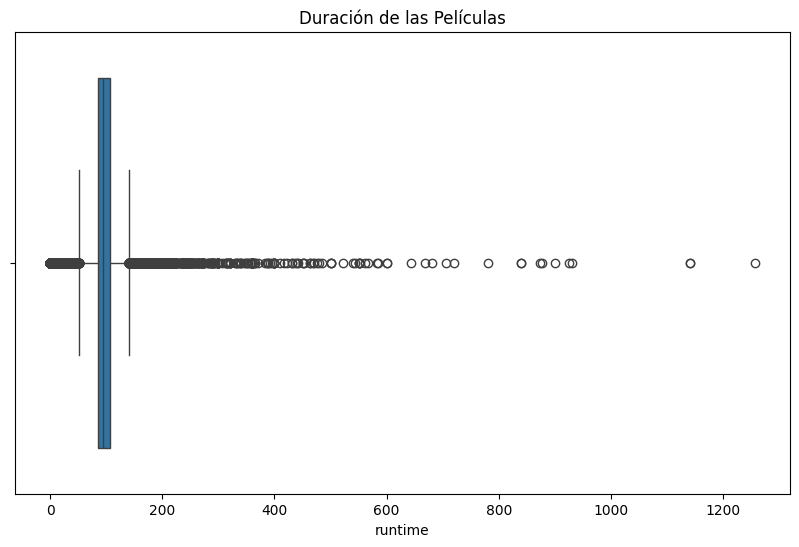

In [16]:
# Boxplot de duración de las películas
plt.figure(figsize=(10,6))
sns.boxplot(x=df['runtime'])
plt.title('Duración de las Películas')
plt.show()

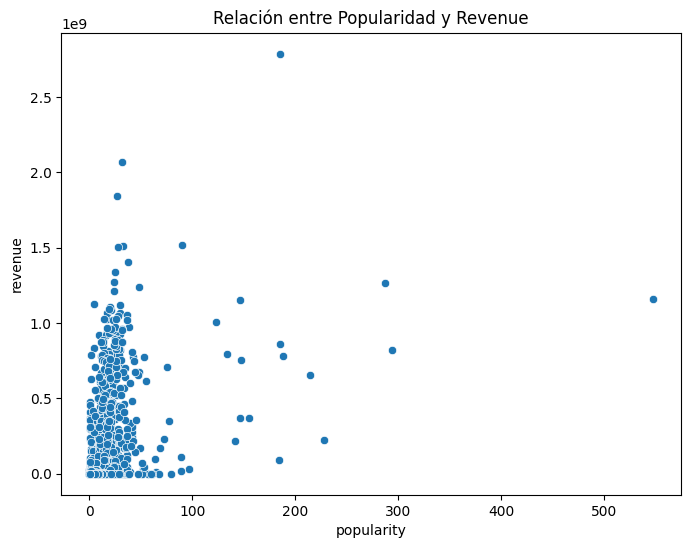

In [17]:
# Relación entre Popularidad y Revenue
# hacemos una visualizacion de como la popularidad de las películas (columna popularity) se relaciona con los ingresos 
# (revenue), ya que en la matriz de correlación hay una correlación moderada entre estas dos variables.

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='popularity', y='revenue')
plt.title('Relación entre Popularidad y Revenue')
plt.show()

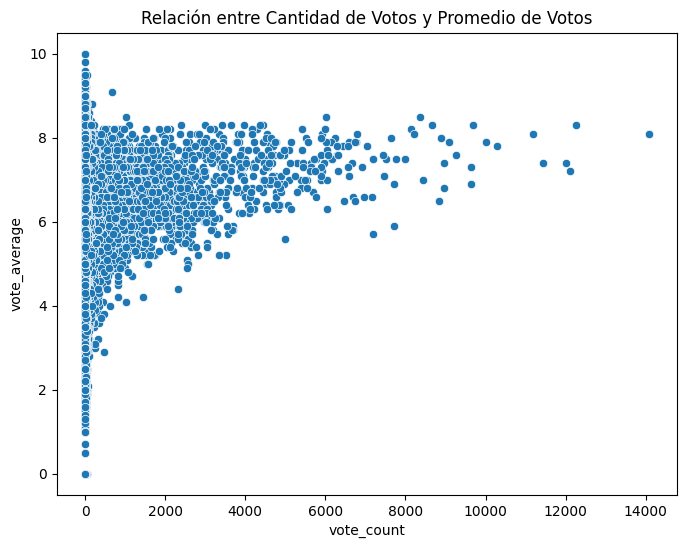

In [18]:
# Relación entre Votos y Promedio de Votos
# Verifiquemos si hay una relación entre la cantidad de votos (vote_count) y el promedio de votos (vote_average), 
# para identificar si las películas con más votos tienden a tener mejor calificación.

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='vote_count', y='vote_average')
plt.title('Relación entre Cantidad de Votos y Promedio de Votos')
plt.show()

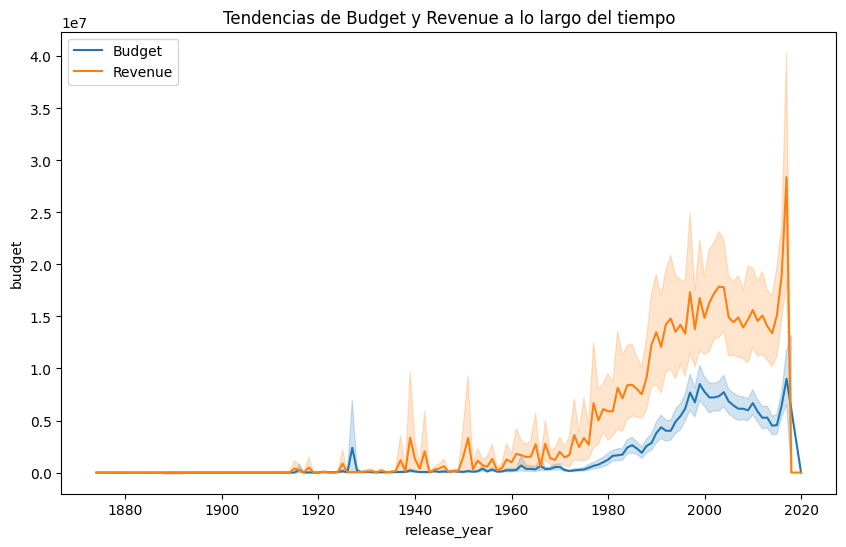

In [19]:
#Tendencias Temporales
# Exploramos si existen patrones temporales.cómo han cambiado los presupuestos o ingresos a lo largo de los años (release_year).

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='release_year', y='budget', label='Budget')
sns.lineplot(data=df, x='release_year', y='revenue', label='Revenue')
plt.title('Tendencias de Budget y Revenue a lo largo del tiempo')
plt.legend()
plt.show()

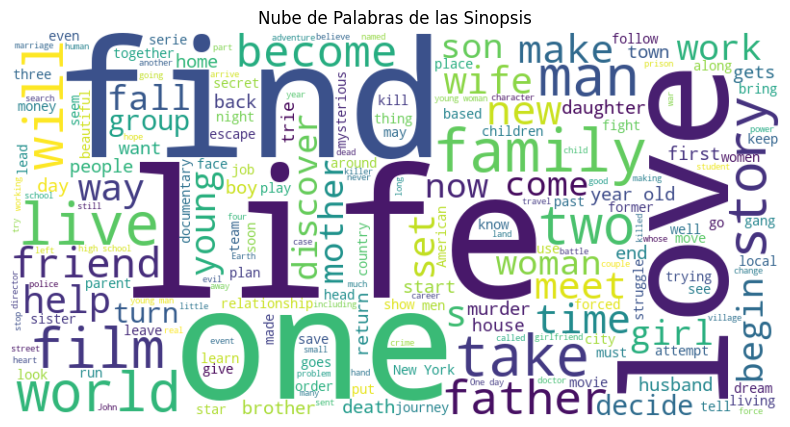

In [20]:
#Distribución de palabras frecuentes
# analicemos cuáles palabras aparecen con más frecuencia.

# Unir todas las descripciones
text_overview = " ".join(desc for desc in df['overview'].dropna())

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_overview)

# Mostrar la nube de palabras
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de las Sinopsis')
plt.show()

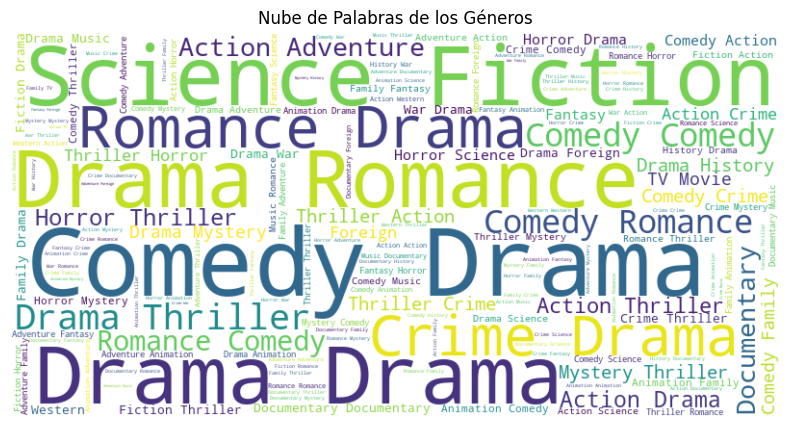

In [21]:
#Distribucion de generos
#analicemos cuales son los generos que mas se repiten 

# Unir todos los géneros en una cadena de texto
text_genres = " ".join([genre for genres in df['name_genres'] for genre in eval(genres)])

# Crear la nube de palabras para los géneros
wordcloud_genres = WordCloud(width=800, height=400, background_color='white').generate(text_genres)

# Mostrar la nube de palabras de géneros
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_genres, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Géneros')
plt.show()

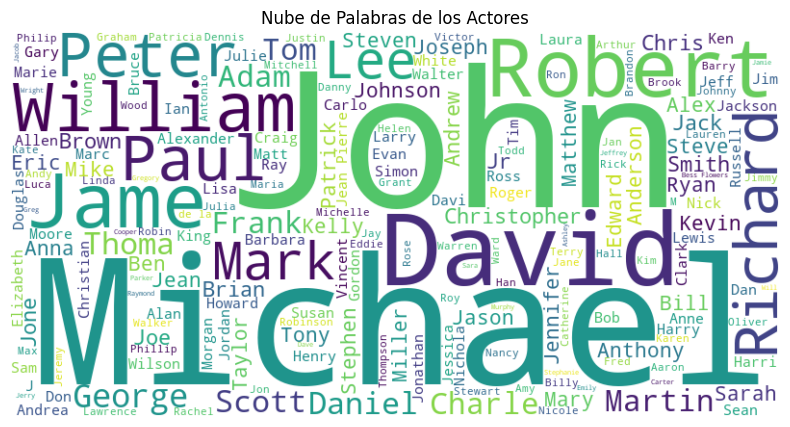

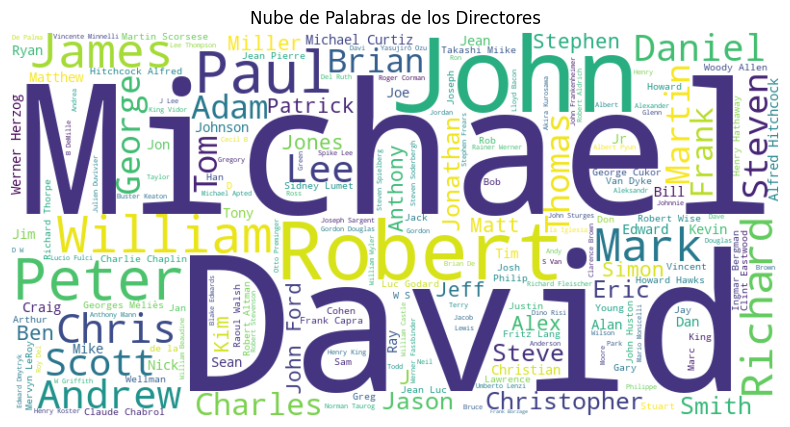

In [22]:
#Distribución de actores y directores
# analicemos cuáles actores y directores aparecen con más frecuencia.

# Unir todos los nombres de actores
text_actors = " ".join([actor for actors in df['names_actors'] for actor in eval(actors)])

# Crear la nube de palabras para los actores
wordcloud_actors = WordCloud(width=800, height=400, background_color='white').generate(text_actors)

# Mostrar la nube de palabras de los actores
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_actors, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Actores')
plt.show()

# Unir todos los nombres de directores
text_directors = " ".join(df['name_director'].dropna())

# Crear la nube de palabras para los directores
wordcloud_directors = WordCloud(width=800, height=400, background_color='white').generate(text_directors)

# Mostrar la nube de palabras de los directores
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_directors, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Directores')
plt.show()